# Ernesto Anronio Reyes Ramírez

# Optimización

# Tarea 7

# Problema 1

In [1]:
import numpy as np
import math

In [2]:
#Vamos a cargar el conjunto de datos

import gzip, pickle
with gzip.open("mnist.pkl.gz","rb") as ff:
    u = pickle._Unpickler( ff )
    u.encoding = "latin1"
    train, val, test = u.load()
    
print( train[0].shape, train[1].shape )
print( val[0].shape, val[1].shape )
print( test[0].shape, test[1].shape )

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


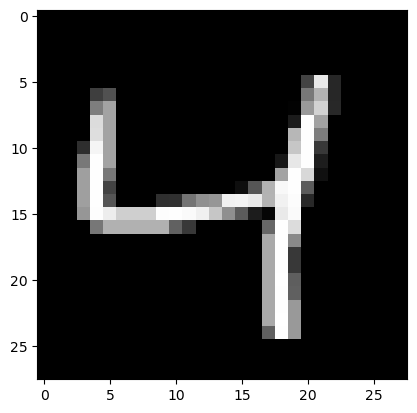

In [3]:
#Para analizar un poco la base de datos vamos a ver algunos de sus elementos

import matplotlib.pyplot as plt
idx = 2 # index of the image
im = train[0][idx].reshape(28, -1)
plt.imshow(im, cmap=plt.cm.gray)

In [4]:
#A continuación vamos a filtrar nuestros datos para solo trabajar con los dígitos 0 y 1
train_filter = np.where((train[1] == 0 ) | (train[1] == 1))
test_filter = np.where((test[1] == 0) | (test[1] == 1))

In [5]:
X_train, Y_train = train[0][train_filter], train[1][train_filter]
X_test, Y_test = test[0][test_filter], test[1][test_filter]

### Algoritmo de descenso de gradiente con tamaño de paso fijo 

In [6]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Función pi_i definida en la tarea
def pi_i(beta,beta0,x):
    return sigmoid(x.T@beta + beta0)

In [7]:
# Función de entropía cruzada
def cross_entropy_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Gradiente de la función de entropía cruzada
def cross_entropy_gradient(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    dw = 1/m * np.dot(X.T, (y_hat - y))
    db = 1/m * np.sum(y_hat - y)
    return dw, db

In [35]:
# Gradiente descendente
def gradient_descent(X_train, Y_train, w, b, alpha, epochs,batch_size):
    for i in range(epochs):
        smpIdx = np.random.randint(low=0, high=X_train.shape[0], size=batch_size, dtype='int32') #Tomamos solo una muestra
        X = X_train[smpIdx]
        y = Y_train[smpIdx]
        dw, db = cross_entropy_gradient(X_train, Y_train, w, b)
        aux = np.insert(dw,len(dw),db)
        norm = np.linalg.norm(aux)
        w -= alpha * dw
        b -= alpha * db
       
        if i % 1000 == 0:
            loss = cross_entropy_loss(Y_train, sigmoid(np.dot(X_train, w) + b))
            print("Epoch %d - h = %.4f - ||grad_h|| = %.4f" % (i, loss,norm))
    return w, b

In [36]:
n = X_train.shape[1] #la longitud de cada imagen convertida a vector
w = np.zeros(n)      #inicializamos el vector de pesos en ceros
b = 0                # inicializamos el sesgo o bias en 0
alpha = 0.1          # el tamaño de paso
epochs = 5000        # numero de iteraciones o epocas
batch_size = 128     # tamaño de los lotes a considerar
w, b = gradient_descent(X_train, Y_train, w, b, alpha, epochs,batch_size) 

Epoch 0 - h = 0.4405 - ||grad_h|| = 1.8005
Epoch 1000 - h = 0.0070 - ||grad_h|| = 0.0054
Epoch 2000 - h = 0.0053 - ||grad_h|| = 0.0032
Epoch 3000 - h = 0.0045 - ||grad_h|| = 0.0024
Epoch 4000 - h = 0.0041 - ||grad_h|| = 0.0020


Finalmente, mostramos los máximos de la función encontrados:

In [37]:
print("Beta_0 = ", b)
print("Beta_max = ", w)

Beta_0 =  0.47822171740462666
Beta_max =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.16868333e-04
 -4.28653815e-04 -1.76205521e-04  6.81560187e-04 -2.85506965e-03
 -1.05677922e-02 -5.09763231e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00

### Prueba con el conjunto de Test

Vamos a calcular el error planteado en el punto (2)

In [38]:
#Definimos la función indicadora
def ind_function(w,b,x):
    return 1 if pi_i(w,b,x)>=0.5 else 0

#Definimos la función de error
def error(w,b,X,y):
    e = (1.0/len(y))*sum([abs(ind_function(w,b,X[i]) - y[i]) for i in range(len(y))])
    return e

In [39]:
err = error(w,b,X_test,Y_test)
print("Error sobre el conjunto de prueba: ", err)

Error sobre el conjunto de prueba:  0.00047281323877068556


Como complemento vamos a gregar otra manera de medir que tan buena ha sido la solución llamado Accurary. Esta medida es el porcetanje de casos que logramos acertar, y como podemos ver es un porcentaje demasiado alto. 

In [40]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

Y_pred = predict(X_test, w, b)
Y_pred_class = np.where(Y_pred >= 0.5, 1, 0)

accuracy = np.mean(Y_pred_class == Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9995271867612293


Finalmente para hacer uso de las herramientas visuales mostraremos algunos ejemplos sobre las predicciones que se obtuvieron.

Etiqueta real:  1
Etiqueta estimada con el modelo:  1


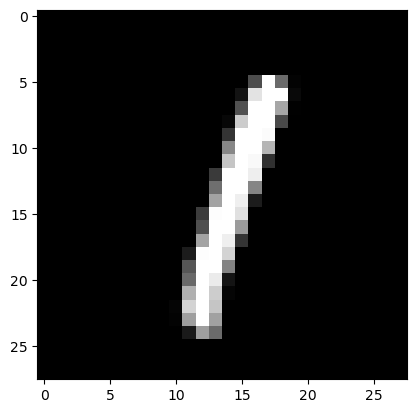

In [41]:
idx = 2 # index of the image
im = X_test[idx].reshape(28, -1)
plt.imshow(im, cmap=plt.cm.gray)

print("Etiqueta real: ", Y_test[idx])
print("Etiqueta estimada con el modelo: ", Y_pred_class[idx])

### Algoritmo de Newton

En el algoritmo anterior definimos la función de entropia cruzada y su gradiente, por lo que ahora solo vamos a definir su matriz hessiana

In [16]:
def cross_entropy_hessian(X,w,b):
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X, w) + b)
    d = y_pred * (1 - y_pred)
    hess_w = (1/m)*np.dot(X.T * d, X)
    hess_b = (1/m)*np.sum(d)
    return hess_w, hess_b

In [42]:
def newton_method(X_train, Y_train, w_init, b_init, epochs=100, tol=1e-5):
    w, b = w_init, b_init
    for i in range(epochs):
        grad_w, grad_b = cross_entropy_gradient(X_train, Y_train, w, b)
        hess_w, hess_b = cross_entropy_hessian(X_train,w,b)
        # regularización para mejorar la estabilidad si es necesario
        eps = 1e-6
        hess_w += np.eye(hess_w.shape[0]) * eps
        hess_b += eps
        # actualizar los pesos y sesgo usando el método de Newton modificado
        delta_w = np.linalg.solve(hess_w, -grad_w)
        delta_b = (-grad_b)/hess_b 
        w += delta_w
        b += delta_b
        
        #Calculamos el valor de la función en el punto en el que vamos
        loss = cross_entropy_loss(Y_train, sigmoid(np.dot(X_train, w) + b))
        aux = np.insert(grad_w,len(grad_w),grad_b)
        norm = np.linalg.norm(aux)
        print("Epoch %d - h = %.4f - ||grad_h|| = %.4f" % (i, loss,norm))
        
        # verificar si se ha alcanzado la tolerancia
        aux = np.linalg.norm(np.insert(w,len(w),b))
        if  aux < tol:
            break
        
    return w,b

In [43]:
n = X_train.shape[1] #la longitud de cada imagen convertida a vector
w_init = np.zeros(n)      #inicializamos el vector de pesos en ceros
b_init = 0                # inicializamos el sesgo o bias en 0
epochs = 10       # numero de iteraciones o epocas

w2,b2 = newton_method(X_train, Y_train, w_init, b_init, epochs, tol=1e-5)

Epoch 0 - h = 0.1444 - ||grad_h|| = 1.8005
Epoch 1 - h = 0.0538 - ||grad_h|| = 0.4911
Epoch 2 - h = 0.0218 - ||grad_h|| = 0.1641
Epoch 3 - h = 0.0092 - ||grad_h|| = 0.0618
Epoch 4 - h = 0.0039 - ||grad_h|| = 0.0236
Epoch 5 - h = 0.0016 - ||grad_h|| = 0.0092
Epoch 6 - h = 0.0007 - ||grad_h|| = 0.0036
Epoch 7 - h = 0.0003 - ||grad_h|| = 0.0014
Epoch 8 - h = 0.0001 - ||grad_h|| = 0.0005
Epoch 9 - h = 0.0000 - ||grad_h|| = 0.0002


Los valores máximos encontrados mediante el algoritmo de Newton modificado son:

In [21]:
print("Beta_0 = ", b2)
print("Beta_max = ", w2)

Beta_0 =  0.09495183293731416
Beta_max =  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.23465965e-01
 -1.03466320e+00 -4.25316096e-01  1.10136212e+00 -1.28529974e+00
 -2.43696646e+00 -1.16394792e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00

Finalmente, calculamos el error definido en el punto (2) sobre el conjunto de prueba

In [19]:
error2 = error(w2,b2,X_test,Y_test)
print("Error sobre el conjunto de prueba: ", error2)

Error sobre el conjunto de prueba:  0.00047281323877068556


Agreamos el cálculo del acurray también para tener otra métrica sobre el rendimiento 

In [20]:
Y_pred2 = predict(X_test, w2, b2)
Y_pred_class2 = np.where(Y_pred2 >= 0.5, 1, 0)

accuracy2 = np.mean(Y_pred_class2 == Y_test)
print("Accuracy:", accuracy2)

Accuracy: 0.9995271867612293


Un ejemplo visual de la predicción sería el siguiente. 

Etiqueta real:  0
Etiqueta estimada con el modelo:  0


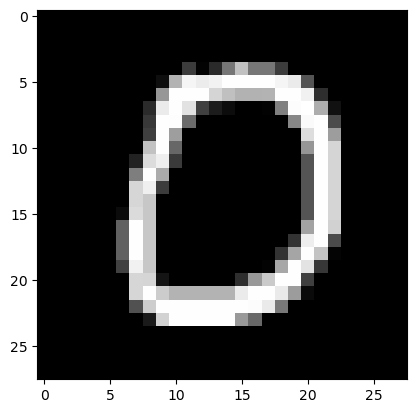

In [32]:
idx = 3 # index of the image
im = X_test[idx].reshape(28, -1)
plt.imshow(im, cmap=plt.cm.gray)

print("Etiqueta real: ", Y_test[idx])
print("Etiqueta estimada con el modelo: ", Y_pred_class2[idx])